## Advantages of Naive Bayes
1. Extremely fast for training and prediction
2. Provide straightforward probabilistic prediction
3. Easily interpretable
4. Very few tunable parameters
  
## Naive Bayes work well when
1. Their assumptions actually **match** the data
2. For very well-separated categories or high-dimensional data, *when model complexity is less important*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

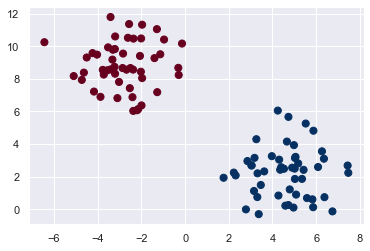

In [11]:
#Gaussian Naive Bayes
#Data from each label is drawn from a simple Gaussian distribution
#Assumption: Assume that the data are described by a Gaussian distribution with no covariance between dimensions
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers = 2, cluster_std = 1.5, random_state = 42)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'RdBu', s = 50)

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

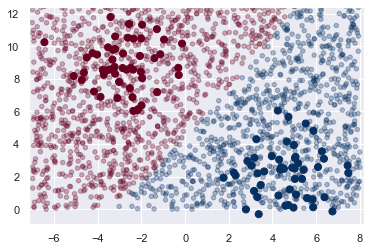

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

rng = np.random.RandomState(0)
Xnew = [-7, 0] + [15, 13] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, s = 20, cmap = 'RdBu', alpha = 0.3)
plt.axis(lim)

yproba = model.predict_proba(Xnew)
yproba[-8:].round(2)

In [17]:
#Multinomial Naive Bayes: Count/ Count Rates for Text Data
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Text(30.453124999999993, 0.5, 'Predicted Labels')

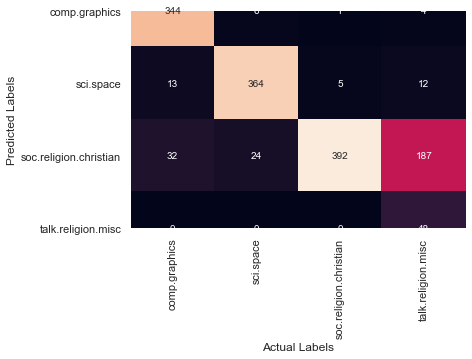

In [25]:
categories = ['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

mat = confusion_matrix(test.target, labels)
sb.heatmap(mat.T, cbar = None, fmt = 'd', annot = True, xticklabels = test.target_names, yticklabels = test.target_names)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

In [31]:
def predict_labels(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]
print(predict_labels('sending a payload to the ISS'))
print(predict_labels('discussing islam vs atheism'))

sci.space
soc.religion.christian
